# Trend lines

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import sympy as sp
from scipy.optimize import curve_fit
import pandas as pd

## Data

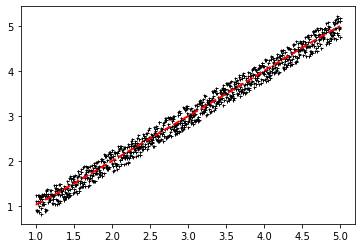

In [2]:
x = np.linspace(1, 5, 1000)
y = (np.random.random(1000)-.5)*.5 + x

fig, ax = plt.subplots()
ax.plot(x,y,"+", ms=3, mec="k")
z = np.polyfit(x, y, 5)
y_hat = np.poly1d(z)(x)

ax.plot(x, y_hat, "r--", lw=2)

## Polyfit
### linear

 
1 x - 0.002691


1.0000315822*x - 0.0026905161

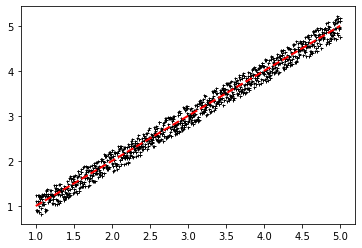

In [3]:
fig, ax = plt.subplots()
ax.plot(x,y,"+", ms=3, mec="k")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

ax.plot(x, y_hat, "r--", lw=2)

print(np.poly1d(z))

xs = sp.symbols("x")
poly = sum(sp.S("{:6.10f}".format(v))*xs**i for i, v in enumerate(z[::-1]))
display(poly)

In [4]:
r2_score(y, y_hat)

0.9853522750191618

### higher order

           5           4          3          2
-0.004156 x + 0.06151 x - 0.3461 x + 0.9233 x - 0.1692 x + 0.5604


-0.0041558819*x**5 + 0.0615078579*x**4 - 0.3460997406*x**3 + 0.9232681905*x**2 - 0.1691921852*x + 0.5603744725

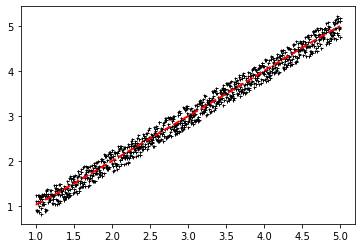

In [5]:
fig, ax = plt.subplots()
ax.plot(x,y,"+", ms=3, mec="k")
z = np.polyfit(x, y, 5)
y_hat = np.poly1d(z)(x)

ax.plot(x, y_hat, "r--", lw=2)

print(np.poly1d(z))

xs = sp.symbols("x")
poly = sum(sp.S("{:6.10f}".format(v))*xs**i for i, v in enumerate(z[::-1]))
display(poly)

In [6]:
r2_score(y,y_hat)

0.9853974797648741

## curve_fit
### polynom with bounds

In [7]:
def func(x, a, b, c):
    return a * x**5 + b * x**3 + c*x

In [8]:
popt, pcov = curve_fit(func, x, y, ftol=1e-15, xtol=1e-15, gtol=1e-16, bounds=([-np.inf, -np.inf, 0], np.inf))
popt, pcov

/home/t7610/.local/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:117: UserWarning: `gtol` is too low, setting to machine epsilon 2.220446049250313e-16.
  warn(message.format("`gtol`", EPS))


(array([ 2.07216972e-05, -4.00726388e-04,  9.99708837e-01]),
 array([[ 1.21203094e-09, -3.41452544e-08,  1.88758992e-07],
        [-3.41452544e-08,  1.00822984e-06, -6.01798414e-06],
        [ 1.88758992e-07, -6.01798414e-06,  4.19156858e-05]]))

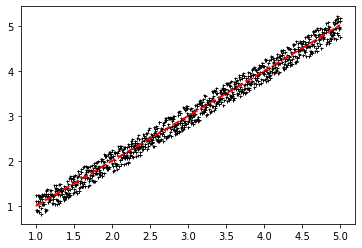

In [9]:
fig, ax = plt.subplots()
ax.plot(x,y,"+", ms=3, mec="k")

ax.plot(x, func(x, *popt), "r--", lw=2)

In [10]:
np.min(np.diff(y) / np.diff(x)), np.min(np.diff(func(x, *popt)) / np.diff(x))

(-120.94309272117074, 0.996221594066984)

In [11]:
r2_score(y,func(x, *popt))

0.9853674070729102

### logarithm

In [12]:
#x = np.linspace(1e-5, 2, 1000)
#y = 3 * np.log(x)

In [13]:
def func_log(x, a, b):
    return a * np.log(x) + b

In [14]:
popt, pcov = curve_fit(func_log, x, y, ftol=1e-15, xtol=1e-15, gtol=1e-15, )
                       #p0=[1,1,1], bounds=([-np.inf, 0, -np.inf], np.inf))
popt, pcov

(array([2.58971422, 0.37767511]),
 array([[ 0.00039208, -0.00039662],
        [-0.00039662,  0.00047612]]))

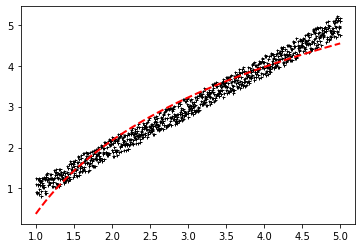

In [15]:
fig, ax = plt.subplots()
ax.plot(x,y,"+", ms=3, mec="k")

ax.plot(x, func_log(x, *popt), "r--", lw=2)

In [16]:
r2_score(y,func_log(x, *popt))

0.9448723218305762

### exp

In [17]:
#x = np.linspace(1e-5, 2, 1000)
#y = 3 * np.exp(x)

In [18]:
def func_exp(x, a, b):
    return a * np.exp(b*x) 

In [19]:
popt, pcov = curve_fit(func_exp, x, y, maxfev=1000, ftol=1e-15, xtol=1e-15, gtol=1e-15)
popt, pcov

(array([1.06277388, 0.32383148]),
 array([[ 9.36607461e-05, -2.18049423e-05],
        [-2.18049423e-05,  5.42549280e-06]]))

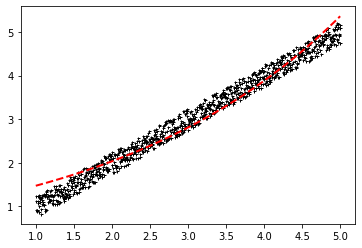

In [20]:
fig, ax = plt.subplots()
ax.plot(x,y,"+", ms=3, mec="k")

ax.plot(x, func_exp(x, *popt), "r--", lw=2)

In [21]:
r2_score(y,func_exp(x, *popt))

0.9596032369017533

### power

In [22]:
#x = np.linspace(1e-5, 2, 1000)
#y = x**5

In [23]:
def func_pow(x, a, b):
    return a * x**b 

In [24]:
popt, pcov = curve_fit(func_pow, x, y, ftol=1e-15, xtol=1e-15, gtol=1e-16)
popt, pcov

(array([0.9962382 , 1.00234141]),
 array([[ 3.73001518e-05, -2.75387421e-05],
        [-2.75387421e-05,  2.14312793e-05]]))

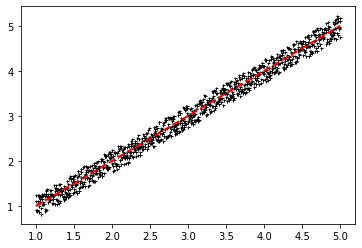

In [25]:
fig, ax = plt.subplots()
ax.plot(x,y,"+", ms=3, mec="k")

ax.plot(x, func_pow(x, *popt), "r--", lw=2)

In [26]:
r2_score(y, func_pow(x, *popt))

0.9853553337154328

## Copy to clipboard

In [27]:
df = pd.DataFrame(np.vstack((x, y)).T)
df.to_clipboard(index=False, header=False)

In [89]:
%matplotlib widget

In [90]:
xy = np.array([[13,0.0055],
[15,0.0048],
[20,0.004],
[30,0.003],
[50,0.0022],
[100,0.00165],
[500,0.0012]])
x = xy[:, 0]
y = xy[:, 1]

In [91]:
def func_pow(x, a, b, c):
    return a * x**(x*b+c)

In [92]:
popt, pcov = curve_fit(func_pow, x, y, ftol=1e-15, xtol=1e-15, gtol=1e-16,
                      bounds=(-100, 100))
popt, pcov

/home/t7610/.local/lib/python3.7/site-packages/scipy/optimize/_lsq/least_squares.py:117: UserWarning: `gtol` is too low, setting to machine epsilon 2.220446049250313e-16.
  warn(message.format("`gtol`", EPS))


(array([ 3.18869938e-02,  3.44609464e-04, -6.97813427e-01]),
 array([[ 8.13979793e-06,  1.07455495e-07, -8.88913078e-05],
        [ 1.07455495e-07,  2.42840542e-09, -1.23454181e-06],
        [-8.88913078e-05, -1.23454181e-06,  9.89887518e-04]]))

/opt/anaconda3/envs/shared_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


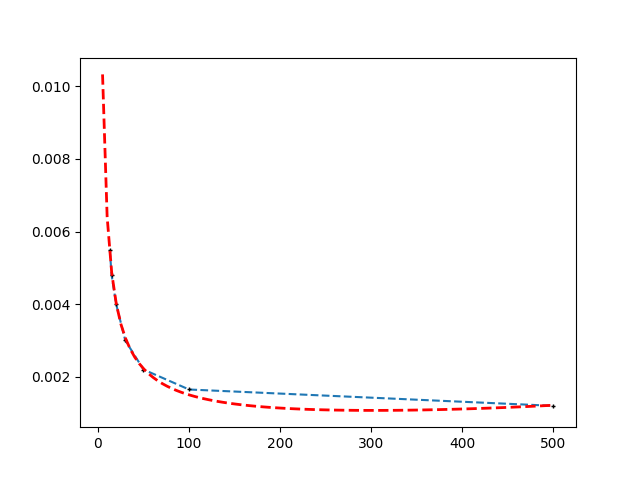

In [93]:
fig, ax = plt.subplots()
ax.plot(x,y,"+--", ms=3, mec="k")

x = np.linspace(0, 500, 100)
ax.plot(x, func_pow(x, *popt), "r--", lw=2)